In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [2]:
bike=pd.read_csv('hour.csv')

In [3]:
# biketest=pd.read_csv('hour.csv')

In [4]:
# biketest['holiday'].value_counts()

In [5]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
bike.shape

(17379, 17)

In [7]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [10]:
# instatnt no info
# apart from temp, atemp, windspeed, hum and count, rest all are categorical

instant: record index

dteday : date

season : season (1:springer, 2:summer, 3:fall, 4:winter)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [11]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# there are no missing values

# EDA

# Univariate Analysis

In [13]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [14]:
# drop instant, dteday, casual and registered

In [15]:
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [16]:
bike.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [17]:
bike['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [18]:
# almost equal data for each season

In [19]:
bike['yr'].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [20]:
# as expected, almost equal entries for both the years

In [21]:
bike['mnth'].value_counts()

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: mnth, dtype: int64

In [22]:
# maximum records are from may and july
# still, there is not much deviation

In [23]:
bike['hr'].value_counts()

16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

In [24]:
bike['weekday'].value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [25]:
bike['workingday'].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

In [26]:
# weekdays have almost double number of entries

In [27]:
bike['weathersit'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [28]:
# there is significant difference in entries based on the weather

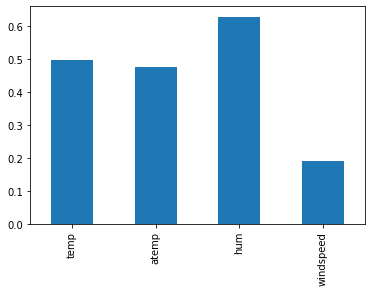

In [29]:
bike.describe().loc['mean',['temp', 'atemp', 'hum', 'windspeed']].plot.bar()

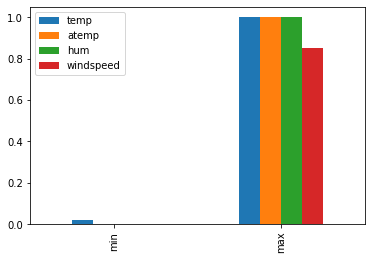

In [30]:
bike.describe().loc[['min','max'],['temp', 'atemp', 'hum', 'windspeed']].plot.bar()

In [31]:
bike.describe()[['cnt']]

,cnt
count,17379.000000
mean,189.463088
std,181.387599
min,1.000000
25%,40.000000
50%,142.000000
75%,281.000000
max,977.000000


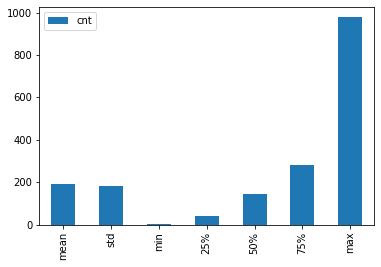

In [32]:
bike.describe()[['cnt']].drop('count',axis=0).plot.bar()

In [33]:
# making boxplot to check for outliers

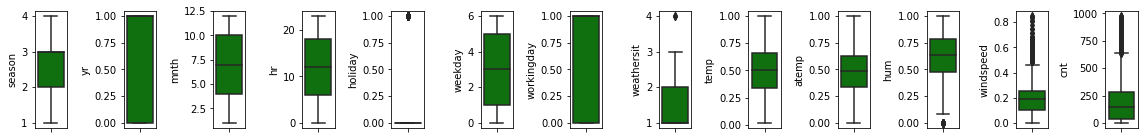

In [34]:
cols=bike.columns.values
plt.figure(figsize=(16,24))
for i in range(len(cols)):
    plt.subplot(13,13,i+1)
    sns.boxplot(bike[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [35]:
# there are a few outliers in Holiday, weathersit, hum, windspeed and count

In [36]:
# checking for the distribution
# making distplot

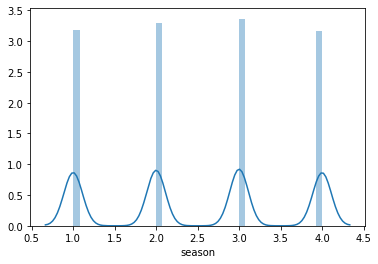

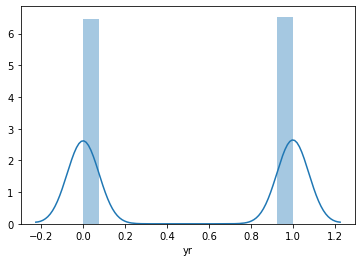

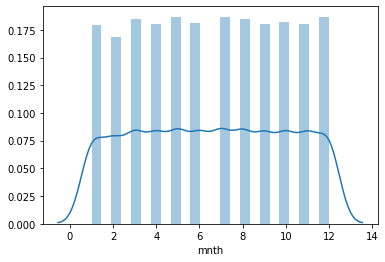

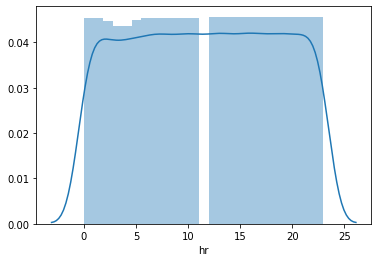

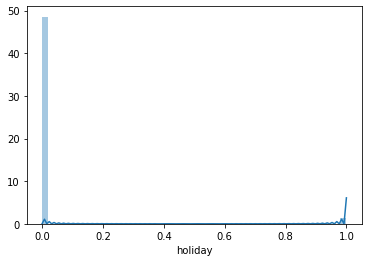

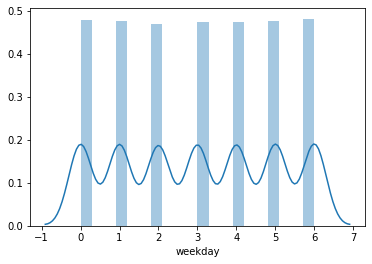

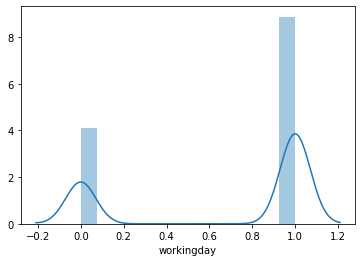

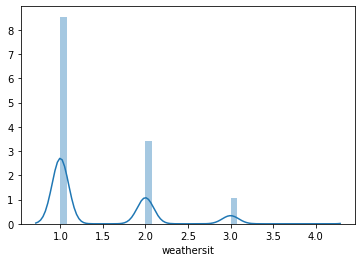

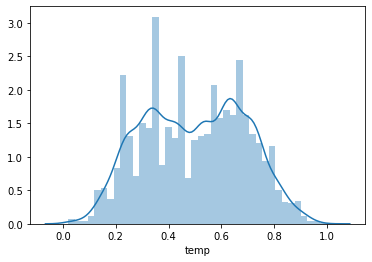

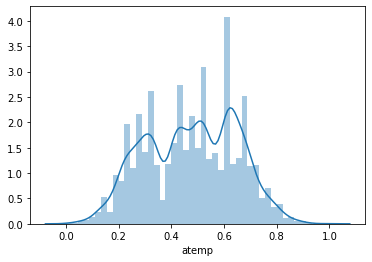

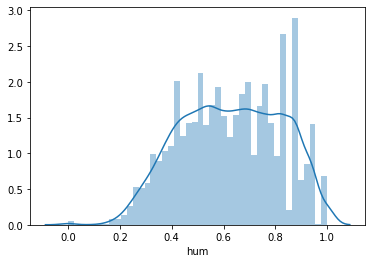

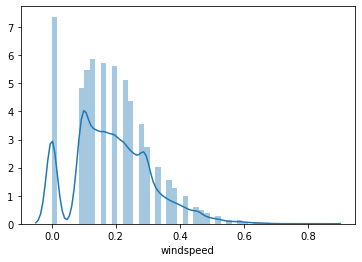

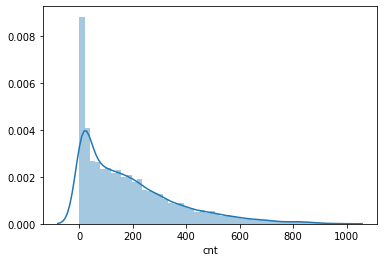

In [37]:
for i in cols:
    plt.subplots()
    sns.distplot(bike[i])

In [38]:
# holiday, workingday, weathersit,temp, atemp, hum, windspeed, count are skewed

In [39]:
# checking for values of skewness

In [40]:
bike.skew()

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
cnt           1.277412
dtype: float64

In [41]:
# there is a large skewness in Holiday
# No skewness in temp, atemp, hum

# Bivariate Analysis

In [42]:
bike.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [43]:
bike.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [44]:
bike.groupby('season').describe()[['cnt']]

cnt                                                        
         count        mean         std  min   25%    50%    75%    max
season                                                                
1       4242.0  111.114569  119.224010  1.0  23.0   76.0  158.0  801.0
2       4409.0  208.344069  188.362473  1.0  46.0  165.0  311.0  957.0
3       4496.0  236.016237  197.711630  1.0  68.0  199.0  345.0  977.0
4       4232.0  198.868856  182.967972  1.0  46.0  155.5  295.0  967.0

In [45]:
bike.groupby('yr').describe()[['cnt']]

cnt                                                        
     count        mean         std  min   25%    50%    75%    max
yr                                                                
0   8645.0  143.794448  133.797854  1.0  31.0  109.0  211.0  651.0
1   8734.0  234.666361  208.910941  1.0  53.0  191.0  347.0  977.0

In [46]:
bike.groupby('holiday').describe()[['cnt']]

cnt                                                         
           count       mean         std  min    25%    50%     75%    max
holiday                                                                  
0        16879.0  190.42858  181.981435  1.0  40.00  144.0  281.50  977.0
1          500.0  156.87000  156.757478  1.0  28.75   97.0  253.25  712.0

In [47]:
bike.groupby('weekday').describe()[['cnt']]

cnt                                                        
          count        mean         std  min   25%    50%    75%    max
weekday                                                                
0        2502.0  177.468825  168.167710  1.0  40.0  116.0  288.0  776.0
1        2479.0  183.744655  179.514167  1.0  37.0  139.0  268.0  968.0
2        2453.0  191.238891  187.820480  1.0  36.0  147.0  276.0  970.0
3        2475.0  191.130505  190.894464  1.0  36.0  143.0  274.5  977.0
4        2471.0  196.436665  188.011923  1.0  42.0  154.0  280.0  976.0
5        2487.0  196.135907  174.076894  1.0  47.5  165.0  286.5  957.0
6        2512.0  190.209793  179.820569  1.0  42.0  129.0  300.0  783.0

In [48]:
bike.groupby('workingday').describe()[['cnt']]

cnt                                                        
              count        mean         std  min   25%    50%    75%    max
workingday                                                                 
0            5514.0  181.405332  172.853832  1.0  40.0  119.0  292.0  783.0
1           11865.0  193.207754  185.107477  1.0  40.0  151.0  277.0  977.0

In [49]:
bike.groupby('weathersit').describe()[['cnt']]

cnt                                                         
              count        mean         std   min   25%    50%    75%    max
weathersit                                                                  
1           11413.0  204.869272  189.487773   1.0  46.0  159.0  304.0  977.0
2            4544.0  175.165493  165.431589   1.0  40.0  133.0  257.0  957.0
3            1419.0  111.579281  133.781045   1.0  21.0   63.0  152.5  891.0
4               3.0   74.333333   77.925178  23.0  29.5   36.0  100.0  164.0

In [50]:
bike.groupby('season').describe()[['cnt']]

cnt                                                        
         count        mean         std  min   25%    50%    75%    max
season                                                                
1       4242.0  111.114569  119.224010  1.0  23.0   76.0  158.0  801.0
2       4409.0  208.344069  188.362473  1.0  46.0  165.0  311.0  957.0
3       4496.0  236.016237  197.711630  1.0  68.0  199.0  345.0  977.0
4       4232.0  198.868856  182.967972  1.0  46.0  155.5  295.0  967.0

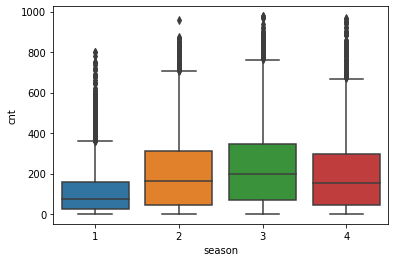

In [51]:
sns.boxplot(data=bike, x='season', y='cnt')

In [52]:
# maximum bikes are rented in season 3

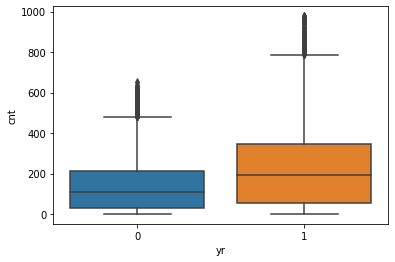

In [53]:
sns.boxplot(data=bike, x='yr', y='cnt')

In [54]:
# In 2012, more bikes were rented

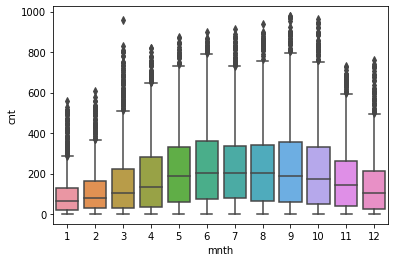

In [55]:
sns.boxplot(data=bike, x='mnth', y='cnt')

In [56]:
# more bikes rented from June to October

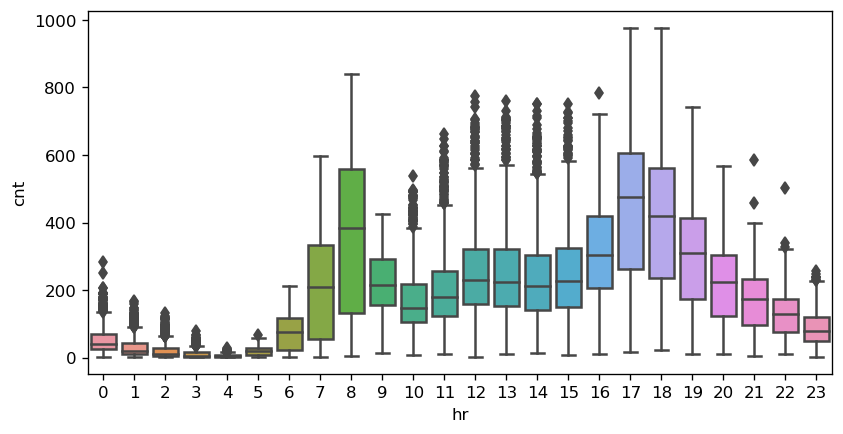

In [57]:
plt.figure(figsize=(8,4), dpi=120, facecolor='w', edgecolor='b')
sns.boxplot(data=bike, x='hr', y='cnt')

In [58]:
# more bikes rented near 8 AM and 5-6 PM

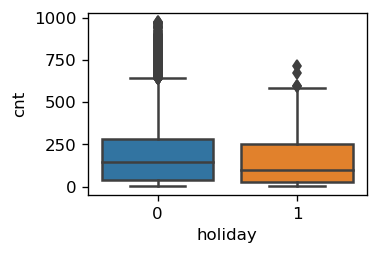

In [59]:
plt.figure(figsize=(3,2), dpi=120, facecolor='w', edgecolor='b')
sns.boxplot(data=bike, x='holiday', y='cnt')

In [60]:
# more bikes rented on a working day

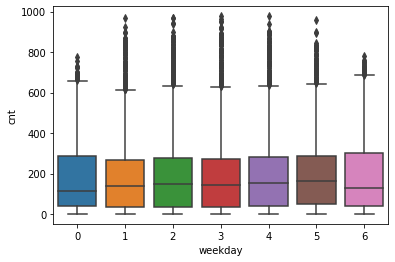

In [61]:
sns.boxplot(data=bike, x='weekday', y='cnt')

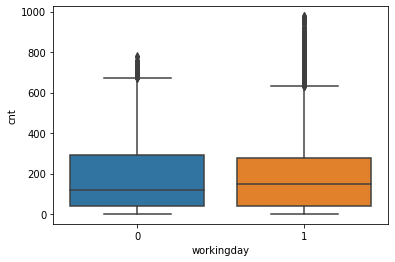

In [62]:
sns.boxplot(data=bike, x='workingday', y='cnt')

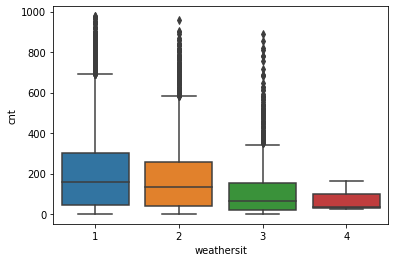

In [63]:
sns.boxplot(data=bike, x='weathersit', y='cnt')

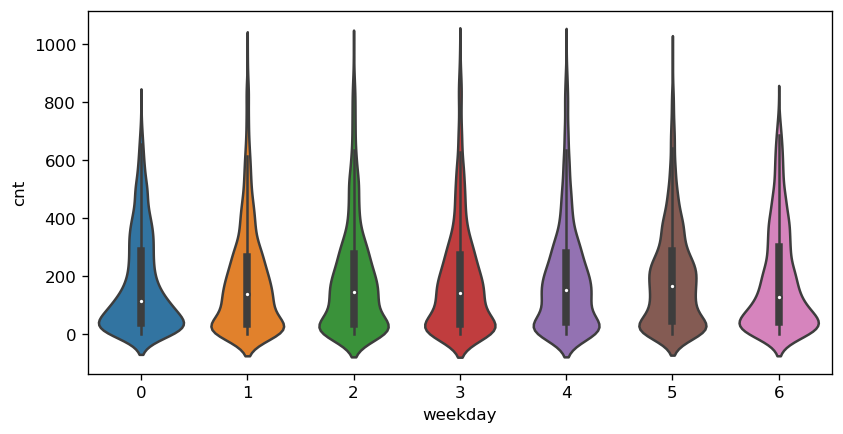

In [64]:
plt.figure(figsize=(8,4), dpi=120, facecolor='w', edgecolor='b')
sns.violinplot(data=bike, x='weekday', y='cnt')

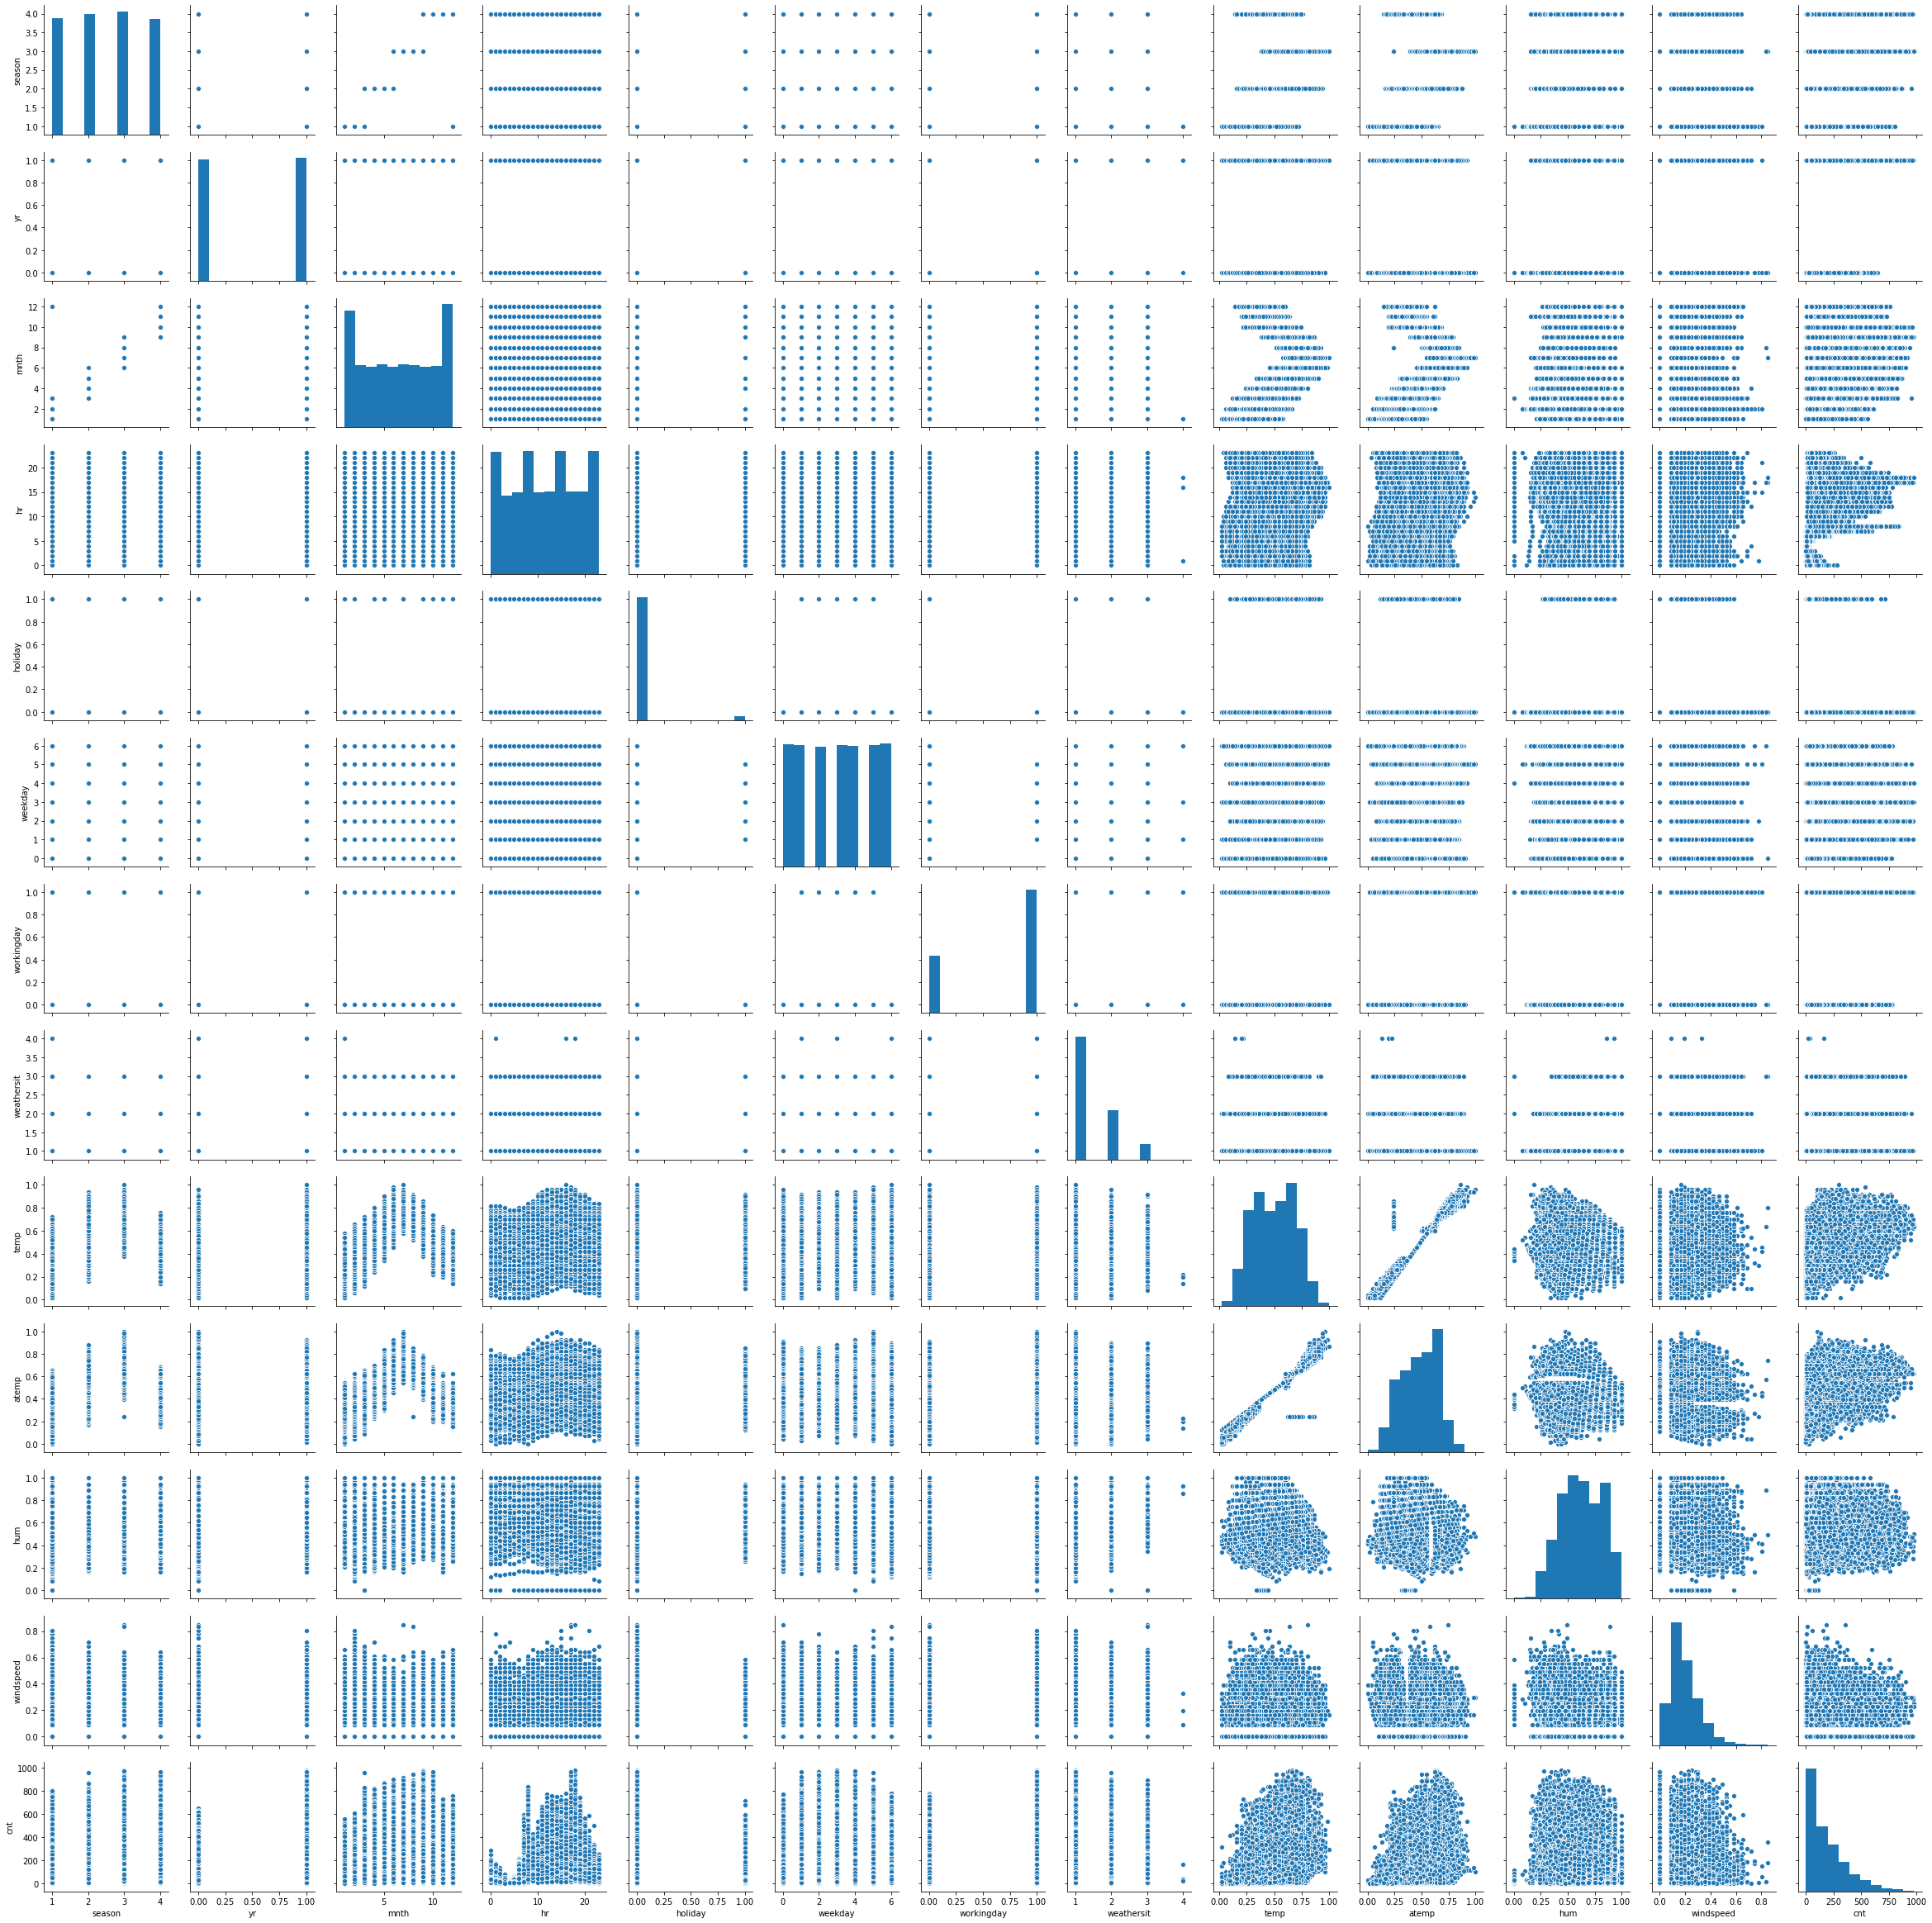

In [65]:
sns.pairplot(bike)

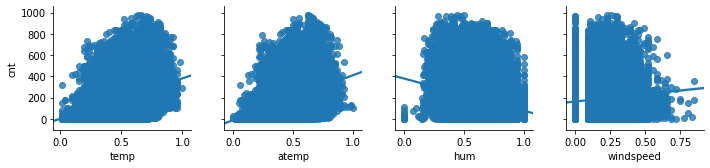

In [66]:
sns.pairplot(bike, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'], kind='reg')

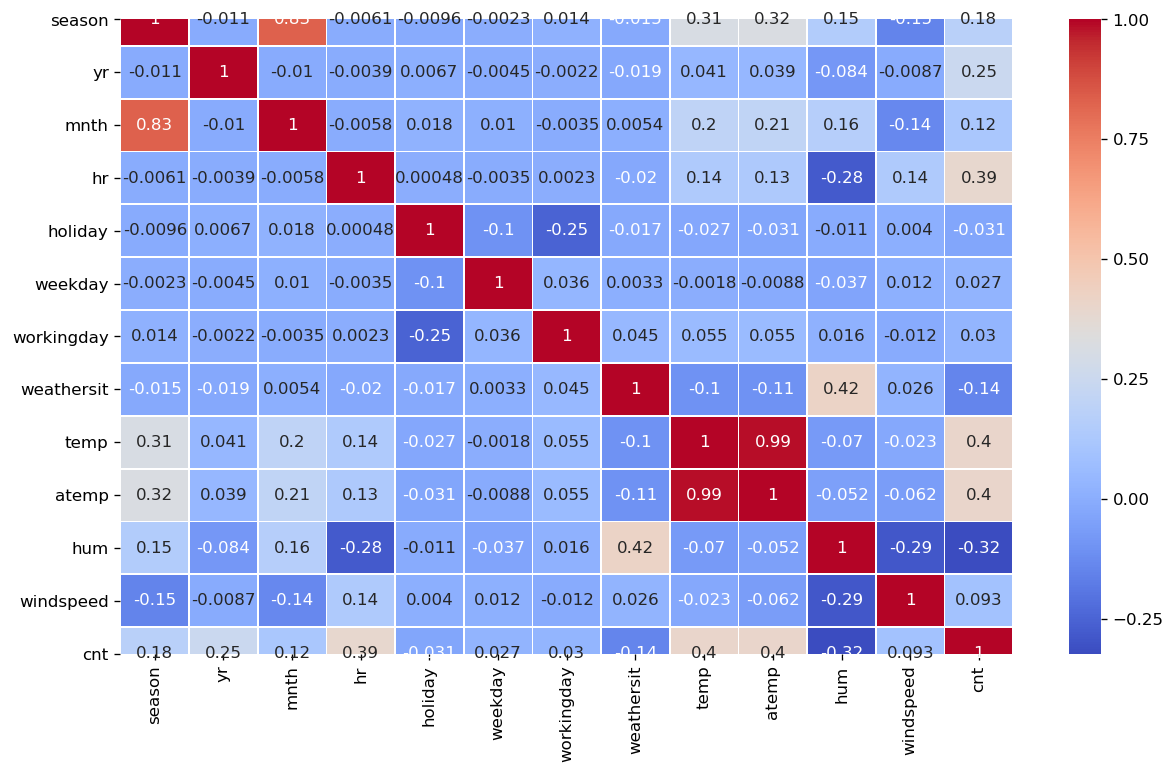

In [67]:
plt.figure(figsize=(12,7), dpi=120, facecolor='w', edgecolor='b')
sns.heatmap(bike.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [68]:
# season and month, temp and atemp have very high correlation

# Outliers

In [69]:
# there are no missing values

In [70]:
from scipy.stats import zscore

In [71]:
z=np.abs(zscore(bike))

In [72]:
np.where(z>3)

(array([  265,   372,   373,   374,   375,   376,   377,   378,   379,
          380,   381,   382,   383,   384,   385,   386,   387,   388,
          389,   390,   391,   392,   393,   394,   395,   467,   468,
          585,   870,  1007,  1009,  1010,  1014,  1017,  1018,  1105,
         1118,  1119,  1120,  1121,  1123,  1124,  1125,  1126,  1127,
         1157,  1158,  1159,  1160,  1161,  1162,  1163,  1164,  1165,
         1166,  1167,  1168,  1169,  1170,  1171,  1172,  1173,  1174,
         1175,  1176,  1177,  1178,  1179,  1180,  1258,  1259,  1261,
         1264,  1332,  1333,  1477,  1482,  1551,  1552,  1553,  1554,
         1555,  1556,  1557,  1558,  1559,  1560,  1561,  1562,  1563,
         1564,  1565,  1566,  1567,  1568,  1568,  1569,  1570,  1571,
         1572,  1873,  2156,  2171,  2402,  2403,  2404,  2405,  2406,
         2407,  2408,  2409,  2410,  2411,  2412,  2413,  2414,  2415,
         2416,  2417,  2418,  2419,  2420,  2421,  2422,  2423,  2424,
      

In [73]:
len(np.where(z>3)[0])

877

In [75]:
bike=bike[(z<3).all(axis=1)]
bike.shape

(16506, 13)

# Variable Transformation

In [76]:
# first, we'll apply some variable transformations
# removal of skewness

In [77]:
bike.skew()

season       -0.005188
yr            0.019632
mnth          0.000436
hr            0.013967
holiday       0.000000
weekday      -0.036488
workingday   -0.868486
weathersit    1.215060
temp         -0.003289
atemp        -0.085390
hum          -0.092995
windspeed     0.387415
cnt           1.048113
dtype: float64

In [78]:
# np.cbrt(bike['holiday']).skew()
# skewness remained

In [79]:
# np.power(bike['workingday'],4).skew()

In [80]:
# np.(bike['windspeed']).skew()

In [81]:
# let's use log transformation because power transformations are not working

In [82]:
bike['holiday_t']=bike['holiday']+5
# bike['holiday_t'].head()
bike['workingday_t']=bike['workingday']+5
bike['weathersit_t']=bike['weathersit']+5
bike['windspeed_t']=bike['windspeed']+5

In [83]:
bike['holiday_t']=np.log(bike['holiday_t'])

In [84]:
np.power(bike['workingday_t'],2).skew()
# still skewness remained

-0.8684861709228648

In [85]:
np.log(bike['weathersit_t']).skew()
# no use

1.108570737972166

In [86]:
from scipy.stats import boxcox

In [87]:
bike['weathersit_t'].head()

0    6
1    6
2    6
3    6
4    6
Name: weathersit_t, dtype: int64

In [88]:
# np.log(bike['windspeed_t']).skew()
bike['windspeed_t']=np.log(bike['windspeed_t'])

In [89]:
bike['holiday'].value_counts()
# in outlier removal, only 0s remained in holiday
# drop it

0    16506
Name: holiday, dtype: int64

In [90]:
bike['holiday_t'].value_counts()

1.609438    16506
Name: holiday_t, dtype: int64

In [91]:
bike.drop(['holiday_t','holiday','workingday_t','weathersit_t','windspeed'],axis=1, inplace=True)

In [92]:
bike.head()

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,cnt,windspeed_t
0,1,0,1,0,6,0,1,0.24,0.2879,0.81,16,1.609438
1,1,0,1,1,6,0,1,0.22,0.2727,0.80,40,1.609438
2,1,0,1,2,6,0,1,0.22,0.2727,0.80,32,1.609438
3,1,0,1,3,6,0,1,0.24,0.2879,0.75,13,1.609438
4,1,0,1,4,6,0,1,0.24,0.2879,0.75,1,1.609438


In [93]:
# seperating x and y
x=bike.drop(['cnt'], axis=1)
# x.head()

In [94]:
y=bike['cnt']

In [95]:
x.shape, y.shape

((16506, 11), (16506,))

In [96]:
# now, let's standard scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm=MinMaxScaler()
scx=StandardScaler()
xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)

In [97]:
xm.head()

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed_t
0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.224490,0.292344,0.793478,0.0
1,0.0,0.0,0.0,0.043478,1.0,0.0,0.0,0.204082,0.276909,0.782609,0.0
2,0.0,0.0,0.0,0.086957,1.0,0.0,0.0,0.204082,0.276909,0.782609,0.0
3,0.0,0.0,0.0,0.130435,1.0,0.0,0.0,0.224490,0.292344,0.728261,0.0
4,0.0,0.0,0.0,0.173913,1.0,0.0,0.0,0.224490,0.292344,0.728261,0.0


In [98]:
xs.head()

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed_t
0,-1.361946,-0.990233,-1.610959,-1.652682,1.468909,-1.524402,-0.668298,-1.334300,-1.094644,0.934473,-1.614365
1,-1.361946,-0.990233,-1.610959,-1.508568,1.468909,-1.524402,-0.668298,-1.438602,-1.183561,0.882249,-1.614365
2,-1.361946,-0.990233,-1.610959,-1.364454,1.468909,-1.524402,-0.668298,-1.438602,-1.183561,0.882249,-1.614365
3,-1.361946,-0.990233,-1.610959,-1.220341,1.468909,-1.524402,-0.668298,-1.334300,-1.094644,0.621130,-1.614365
4,-1.361946,-0.990233,-1.610959,-1.076227,1.468909,-1.524402,-0.668298,-1.334300,-1.094644,0.621130,-1.614365


# Model Building

In [99]:
# now we'll try different models:

# LinearRegression
# DecisionTreeRegressor
# SVR
# KNeighborsRegressor
# RandomForestRegressor
# GradientBoostingRegressor

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [101]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()

In [103]:
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)

In [104]:
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    mse=mean_squared_error(pred,y_test)
    return train_score,test_score,mse

In [105]:
def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

In [106]:
print('LR ', get_score(lr,x,y))
print('DT ', get_score(dt,x,y))
print('SVR ', get_score(svr,x,y))
print('KNN ', get_score(knn,x,y))
print('RF ', get_score(rf,x,y))
print('GBR ', get_score(gbr,x,y))

LR  (0.3875066479573547, -0.645301143970648, 17760.96356019036)
DT  (0.9999879073053689, 0.8856573153187473, 3165.6513811485343)
SVR  (0.5689698852256966, -0.3784083435343233, 12393.439158136818)
KNN  (0.9348022296348818, 0.8739835202855003, 2886.7448122122605)
RF  (0.9882785791211848, 0.9170752507685712, 2107.8012965215516)
GBR  (0.8464343686370647, 0.7587245945948651, 4627.846941601329)


In [107]:
print('LR ', get_score(lr,xs,y))
print('DT ', get_score(dt,xs,y))
print('SVR ', get_score(svr,xs,y))
print('KNN ', get_score(knn,xs,y))
print('RF ', get_score(rf,xs,y))
print('GBR ', get_score(gbr,xs,y))

LR  (0.38750664795735457, -0.6453011439706515, 17760.96356019037)
DT  (0.9999879073053689, 0.8834940197678341, 3227.1117639932154)
SVR  (0.40897007091724696, -1.2157817139141782, 17068.046438920388)
KNN  (0.7641754849676269, 0.3963181267808574, 10989.234262175914)
RF  (0.9875768528008774, 0.9182768436466627, 2085.900933554102)
GBR  (0.8464343686370647, 0.7587254301238179, 4627.8045732449045)


In [108]:
# in a nutshell, we know that DT, KNN, RF and GBR are performing well, that too without standard scaling

In [109]:
print('LR ', get_score(lr,xm,y))
print('DT ', get_score(dt,xm,y))
print('SVR ', get_score(svr,xm,y))
print('KNN ', get_score(knn,xm,y))
print('RF ', get_score(rf,xm,y))
print('GBR ', get_score(gbr,xm,y))

LR  (0.3875066479573547, -0.6453011439706544, 17760.963560190365)
DT  (0.9999879073053689, 0.8864070220913627, 3135.2120184153137)
SVR  (0.2736089387710935, -4.210258999455971, 20705.685119135025)
KNN  (0.7916495153291605, 0.45455908419599145, 10048.626372667797)
RF  (0.9884562973863197, 0.9219593841773209, 1984.0579538371967)
GBR  (0.8464343686370647, 0.758724594594865, 4627.846941601329)


In [110]:
# from above three trials, it is observed
# for DT---use xm
# for KNN---use x
# for RF---use xm
# for GBR---use xs

# DecisionTree

In [111]:
# use the features xm

In [112]:
# let's apply feature engineering
# first we'll apply BFE then PCA

In [113]:
# BFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [118]:
sfs1=sfs(dt, k_features=10, forward=False, verbose=1, cv=5)
sfs1.fit(xm,y)
feat_names=list(sfs1.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.9s finished
Features: 10/10

['season', 'yr', 'hr', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed_t']


In [119]:
x1bfe=xs[feat_names]
get_score(dt,x1bfe,y)

(0.9999747443059195, 0.87862135006378, 3319.0630603343834)

In [121]:
# the best score is still less than xm with all the features
# we won't use BFE

In [122]:
# let's apply pca
# we need stanardized data for PCA, therefore we'll use xs

In [123]:
from sklearn.decomposition import PCA
pca=PCA().fit(xm)

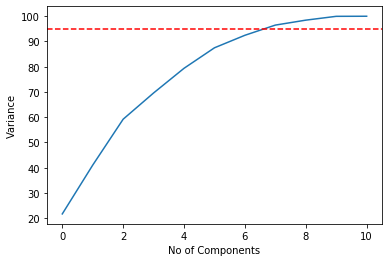

In [124]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('No of Components')
plt.ylabel('Variance')
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [137]:
pca=PCA(n_components=8)

In [138]:
x1pca=pd.DataFrame(pca.fit_transform(xm))
x1pca

,0,1,2,3,4,5,6,7
0,-0.355278,0.877078,0.581151,0.224155,0.499071,-0.618628,-0.048648,-0.333840
1,-0.354787,0.883687,0.581226,0.207863,0.498778,-0.585771,-0.015698,-0.346325
2,-0.355005,0.884062,0.581479,0.190050,0.498018,-0.549937,-0.007470,-0.359579
3,-0.352430,0.883255,0.582202,0.144238,0.497279,-0.508350,-0.017019,-0.353863
4,-0.352647,0.883630,0.582456,0.126425,0.496519,-0.472516,-0.008791,-0.367117
...,...,...,...,...,...,...,...,...
16501,0.486957,0.016484,-0.332305,0.189274,-0.323096,0.370200,0.438248,-0.131377
16502,0.486739,0.016859,-0.332051,0.171461,-0.323855,0.406034,0.446477,-0.144631
16503,0.496141,0.023393,-0.301806,-0.232541,-0.348811,0.182135,0.509186,-0.228182
16504,0.497859,0.020417,-0.300811,-0.264801,-0.349952,0.211558,0.505347,-0.276473


In [139]:
get_score(dt,x1pca,y)

(0.9999879073053689, 0.6132058659236781, 10624.713411679186)

In [140]:
# score has reduced
# let's cross validate it

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
score=cross_val_score(dt,x1pca,y,cv=10,scoring='r2')
score
# score.mean(), score.std()

array([-0.73905204,  0.37718657,  0.45786987,  0.42520896,  0.09407417,
       -0.85970056,  0.46809086,  0.38153167,  0.46503241, -0.01801337])

In [143]:
# we won't use PCA
# we won't use BFE

In [144]:
# now, let's do hyper parameter tuning for original features
params_dt={'criterion':['mse','friedman_mse','mae'], 'max_depth':range(3,16,3), 'splitter':['best','random'], 'max_features':['auto','log2','sqrt']}

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
dtg=GridSearchCV(dt,params_dt)
dtg.fit(xm,y)
dtg.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 12,
 'max_features': 'auto',
 'splitter': 'random'}

In [147]:
dt1=DecisionTreeRegressor(criterion= 'friedman_mse',
 max_depth= 12,
 max_features= 'auto',
 splitter= 'random')

In [148]:
get_score(dt1,xm,y)

(0.9429222860878164, 0.868862667320403, 3396.812843288888)

In [149]:
# the score has decreased

In [150]:
params_dt={'max_depth':range(3,12), 'splitter':['best','random'], 'max_features':['auto','log2','sqrt']}
dtg=GridSearchCV(dt,params_dt)
dtg.fit(xm,y)
dtg.best_params_

{'max_depth': 10, 'max_features': 'auto', 'splitter': 'best'}

In [151]:
dt2=DecisionTreeRegressor(max_depth= 10,
 max_features= 'auto',
 splitter= 'best')

In [152]:
get_score(dt2,xm,y)

(0.9264864143796896, 0.8697346565323634, 3287.6281177999044)

In [153]:
# the score is still lower than the untuned DT

In [155]:
# The best results are from untuned dt and xm all features
# let's try to boost the results using AdaBoostRegressor

In [156]:
from sklearn.ensemble import AdaBoostRegressor

In [157]:
ada=AdaBoostRegressor(base_estimator=dt)

In [158]:
params_ada={'n_estimators':[50,100,200,300,400], 'learning_rate':[0.01,0.1,1]}
adag=GridSearchCV(ada,params_ada)
adag.fit(xm,y)
adag.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [218]:
ada1=AdaBoostRegressor(base_estimator=dt, learning_rate= 1, n_estimators= 200)

In [219]:
get_score(ada1,xm,y)

(0.9993983312085023, 0.922296350913291, 1969.13340501575)

In [220]:
# the model is performing well after boosting
# let's cross validate this
score=cross_val_score(ada1,xm,y,cv=10,scoring='r2')
score.mean(), score.std()

(0.8280164529990003, 0.10364218056003133)

In [221]:
# no need to cross validate

# KNN

In [163]:
# use x as features

In [164]:
# hyper parameter tuning
params_knn={'n_neighbors':range(3,15,2), 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute'], 'p':[1,2]}

In [165]:
knng=GridSearchCV(knn,params_knn)
knng.fit(x,y)
knng.best_params_

{'algorithm': 'brute', 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}

In [168]:
knn1=KNeighborsRegressor(algorithm= 'brute', n_neighbors= 13, p= 1, weights= 'distance')

In [169]:
get_score(knn1,x,y)

(0.9999879073053689, 0.8765463182658514, 2703.161166132487)

In [184]:
params_knn={'n_neighbors':range(3,15)}
knng=GridSearchCV(knn,params_knn)
knng.fit(x,y)
knng.best_params_

{'n_neighbors': 9}

In [185]:
knn2=KNeighborsRegressor( n_neighbors=9)
get_score(knn2,x,y)

(0.919140074102914, 0.8649434173951078, 2972.7021840514285)

In [170]:
# result is same

In [171]:
# now, let's apply BFE and PCA

In [180]:
# BFE
sfs2=sfs(knn, k_features=10, forward=False, verbose=1, cv=5)
sfs2.fit(x,y)
feat_names=list(sfs2.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.8s finished
Features: 10/10

['season', 'yr', 'hr', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed_t']


In [181]:
x2bfe=x[feat_names]
get_score(knn,x2bfe,y)

(0.9262067603725659, 0.8639920852357965, 3310.9966658589774)

In [182]:
# results didn't improve

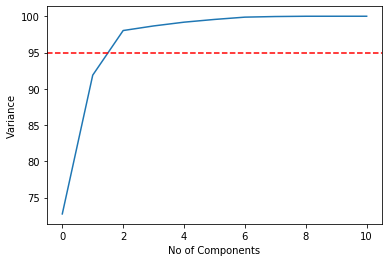

In [186]:
# let's apply PCA
pca=PCA().fit(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('No of Components')
plt.ylabel('Variance')
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [193]:
# take n=3
pca=PCA(n_components=10)
x2pca=pd.DataFrame(pca.fit_transform(x))

In [194]:
get_score(knn,x2pca,y)

(0.9350270610730383, 0.8742509690063007, 2881.4247249818272)

In [195]:
# a very slight improvement

In [196]:
# let's tune the hyper parameters for x2pca

In [197]:
# hyper parameter tuning
params_knn={'n_neighbors':range(3,15,2), 'weights':['uniform','distance'], 'p':[1,2]}

In [198]:
knng=GridSearchCV(knn,params_knn)
knng.fit(x2pca,y)
knng.best_params_

{'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}

In [199]:
knn2=KNeighborsRegressor(n_neighbors= 13, p= 1, weights= 'uniform')

In [200]:
get_score(knn2,x2pca,y)

(0.899490614884749, 0.8333362048291149, 3408.117220555069)

In [201]:
params_knn={'n_neighbors':range(3,18)}
knng=GridSearchCV(knn,params_knn)
knng.fit(x2pca,y)
knng.best_params_

{'n_neighbors': 16}

In [202]:
knn3=KNeighborsRegressor(n_neighbors= 16)
get_score(knn3,x2pca,y)

(0.8986704438681922, 0.8438719999974347, 3240.1049320783864)

In [203]:
# let's boost knn with x2pca

In [205]:
# ada=AdaBoostRegressor(base_estimator=knn)
# params_ada={'n_estimators':[50,100,200,300,400], 'learning_rate':[0.01,0.1,1]}
# adag=GridSearchCV(ada,params_ada)
# adag.fit(x2pca,y)
# adag.best_params_

In [206]:
# grid search took more than half an hour
# trying tuning ada boost manually

In [209]:
ada1=AdaBoostRegressor(base_estimator=knn, learning_rate= 0.01, n_estimators=50)
get_score(ada1,x2pca,y)

(0.9449156471862998, 0.8837915828391291, 2667.178773927793)

In [210]:
ada2=AdaBoostRegressor(base_estimator=knn, learning_rate= 0.1, n_estimators=50)
get_score(ada2,x2pca,y)

(0.9629105523787056, 0.8915731259906023, 2628.7698570390116)

In [211]:
ada3=AdaBoostRegressor(base_estimator=knn, learning_rate=1, n_estimators=50)
get_score(ada3,x2pca,y)

(0.9713571560643339, 0.8585163802940385, 3542.108214199176)

In [212]:
# learning rate 0.1 is best
ada4=AdaBoostRegressor(base_estimator=knn, learning_rate= 0.1, n_estimators=100)
get_score(ada4,x2pca,y)

(0.9697267662755145, 0.8871323851250735, 2784.9763217833774)

In [213]:
ada5=AdaBoostRegressor(base_estimator=knn, learning_rate= 0.1, n_estimators=200)
get_score(ada5,x2pca,y)

(0.9738441863331124, 0.8770553522577607, 3078.1136903319602)

In [214]:
ada6=AdaBoostRegressor(base_estimator=knn, learning_rate= 0.1, n_estimators=150)
get_score(ada6,x2pca,y)

(0.972856873708562, 0.8815361864633066, 2951.8543930215646)

In [215]:
# let's cross validate ada2
score=cross_val_score(ada2,x2pca,y,cv=10,scoring='r2')
score.mean(), score.std()

(0.4211896510720905, 0.7340448765599052)

In [216]:
# cross validating knn with x2pca
score=cross_val_score(knn,x2pca,y,cv=10,scoring='r2')
score.mean(), score.std()

(0.43703078445915483, 0.6923207601285992)

# Random Forest

In [222]:
# use features xm

In [223]:
# hyper parameter tuning
params_rf={'n_estimators':[50,100,150,200,300], 'max_features':['auto','sqrt','log2']}
rfg=GridSearchCV(rf,params_rf)
rfg.fit(xm,y)
rfg.best_params_

{'max_features': 'auto', 'n_estimators': 200}

In [224]:
rf1=RandomForestRegressor(max_features= 'auto', n_estimators= 200)
get_score(rf1,xm,y)

(0.9919191912189076, 0.9282135794834756, 1815.971296489196)

In [225]:
# result improved

In [226]:
# let's apply BFE and PCA

In [228]:
# # BFE
# sfs3=sfs(rf1, k_features=10, forward=False, verbose=1, cv=5)
# sfs3.fit(xm,y)
# feat_names=list(sfs3.k_feature_names_)
# print(feat_names)

In [229]:
# x3bfe=xm[feat_names]
# get_score(rf1,x3bfe,y)

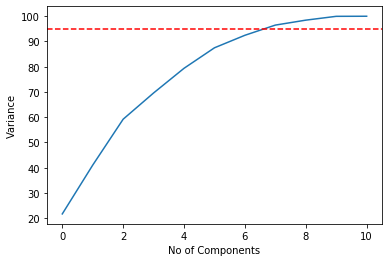

In [230]:
# let's apply PCA
pca=PCA().fit(xm)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('No of Components')
plt.ylabel('Variance')
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [231]:
pca=PCA(n_components=7)
x3pca=pd.DataFrame(pca.fit_transform(xm))
get_score(rf1,x3pca,y)

(0.9697364224636704, 0.6642315798697127, 6650.628905208037)

In [232]:
pca=PCA(n_components=8)
x3pca=pd.DataFrame(pca.fit_transform(xm))
get_score(rf1,x3pca,y)

(0.9785706392445607, 0.7616666267907548, 4790.5737627547005)

In [233]:
pca=PCA(n_components=9)
x3pca=pd.DataFrame(pca.fit_transform(xm))
get_score(rf1,x3pca,y)

(0.9784275803148408, 0.7505715981617335, 4962.741616230521)

In [234]:
pca=PCA(n_components=10)
x3pca=pd.DataFrame(pca.fit_transform(xm))
get_score(rf1,x3pca,y)

(0.9777425458681694, 0.7463755465518314, 5035.375610199428)

In [235]:
# PCA and BFE didn't improve the results
# let's boost rf1 with xm

In [ ]:
# adarf=AdaBoostRegressor(base_estimator=rf1, learning_rate=0.1, n_estimators=50)
# get_score(adarf, xm, y)

In [238]:
# ada=AdaBoostRegressor(base_estimator=rf1)
# params_ada={'n_estimators':[50,100,200,300,400], 'learning_rate':[0.01,0.1,1]}
# adag=GridSearchCV(ada,params_ada)
# adag.fit(x2pca,y)
# adag.best_params_
# taking lot of time

# Saving the model

In [241]:
import joblib

In [242]:
# the best model is rf1 with xm
# let's generate predictions
pred=get_pred(rf1,xm,y)
predictions=pd.DataFrame(pred)
predictions.to_csv('pred_bike_sharing.csv')

In [243]:
joblib.dump(rf1,'rf_bike_sharing.pkl')

['rf_bike_sharing.pkl']